# Exercício 6  
Utilizando o dataset Mushroom Classification (disponível no repositório da disciplina e em https://www.kaggle.com/uciml/mushroom-classification construa um classificador Naive Bayes (Gaussiano ou não) que classifique as amostras em cogumelos comestíveis ou não.  

Avalie as características do problema para eliminar as que não agregam capacidade decisória ao classificador.  

Avalie a precisão, acurácia do classificador. Verifique o tempo de execução.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
mushroom = pd.read_csv('bases/mushrooms.csv') 

mushroom.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
# Entendendo a distribuição dos dados

mushroom.info()

for col in mushroom.columns:
    print()
    print(col)
    print(mushroom[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# Classe para medir o tempo de execução de uma célula
class timeit():
    from datetime import datetime
    def __enter__(self):
        self.tic = self.datetime.now()
    def __exit__(self, *args, **kwargs):
        print('runtime: {}'.format(self.datetime.now() - self.tic))

## Label Encoder

In [5]:
# Removendo a coluna veil-type por só possuir um unico valor
mushroom.drop(columns=['veil-type'], inplace= True)

# Como o método Naive Bayes não exige a criação de variáveis Dummy, utilizamos a transformação para valores numéricos
labelEncoder = LabelEncoder()
mushroom_label = mushroom.apply(labelEncoder.fit_transform)

mushroom_label.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,3,3


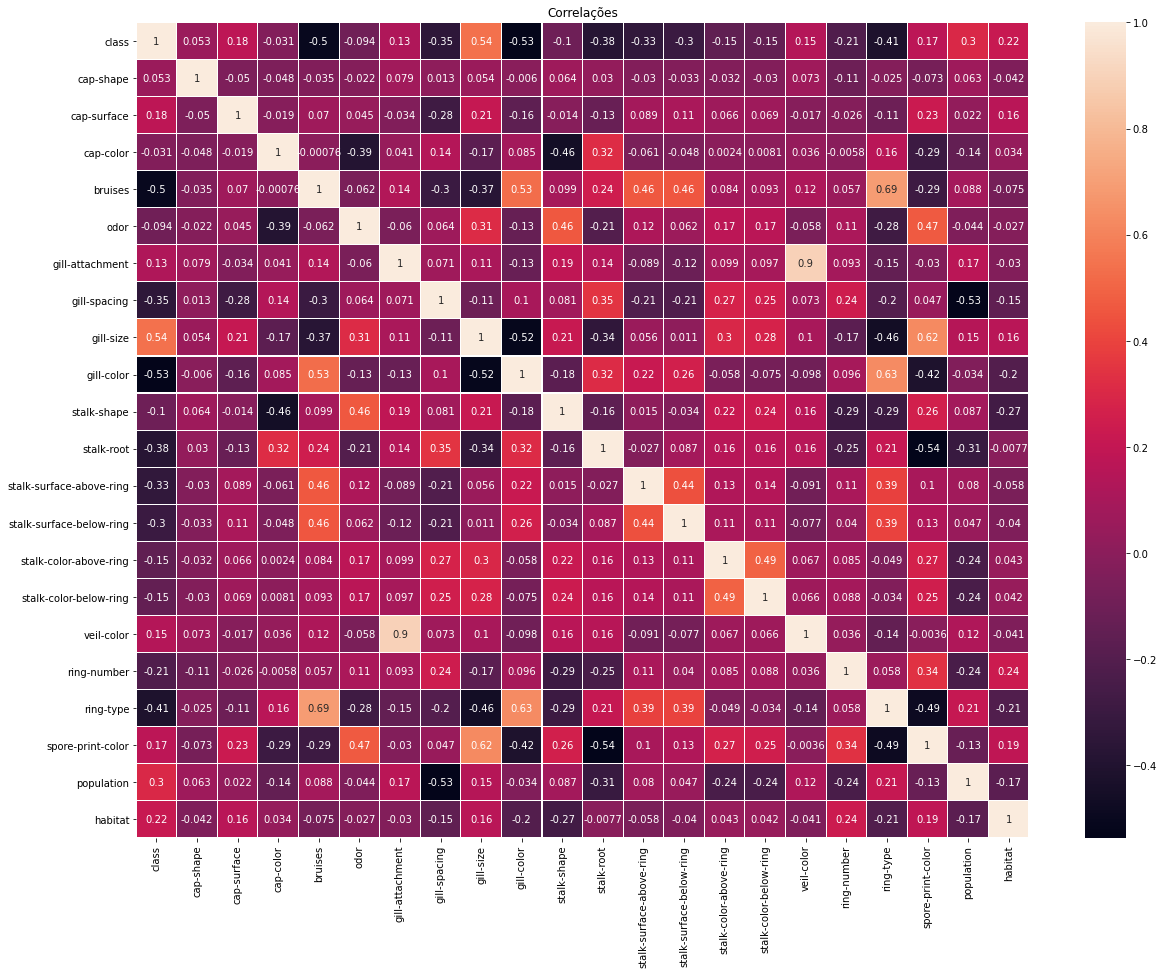

In [6]:
# Matriz de correlação entre as variávies

plt.figure(figsize=(20,15))
sns.heatmap(mushroom_label.corr(), linewidths=.1, annot=True).set_title("Correlações");

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Acurácia do modelo: 0.9218461538461539
[[771  72]
 [ 55 727]]
runtime: 0:00:00.086445


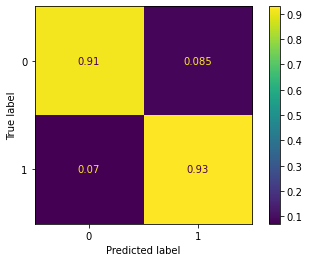

In [7]:
# Utilizando todas as colunas do dataset
with timeit():
    y = mushroom_label.iloc[:,0]
    X = mushroom_label.drop(columns=['class'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

    #classificador Naive Bayes Gaussiano
    classificador = GaussianNB()
    classificador.fit(X_train, y_train)

    y_pred = classificador.predict(X_test)

    print(classification_report(y_test, y_pred))
    print('Acurácia do modelo:', accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plot_confusion_matrix(classificador, X_test, y_test, normalize = 'true');

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       843
           1       0.93      0.87      0.90       782

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

Acurácia do modelo: 0.9095384615384615
[[795  48]
 [ 99 683]]
runtime: 0:00:00.095818


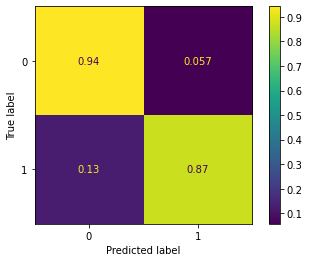

In [8]:
# Removendo colunas com baixa correlação com a variável 'class'
with timeit():
    cols = mushroom_label.columns[(mushroom_label.corr()['class'] != 1) & (abs(mushroom_label.corr()['class']) >= 0.2)]

    y = mushroom_label.iloc[:,0]
    X = mushroom_label.loc[:,cols]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

    #classificador Naive Bayes Gaussiano
    classificador = GaussianNB()
    classificador.fit(X_train, y_train)

    y_pred = classificador.predict(X_test)

    print(classification_report(y_test, y_pred))
    print('Acurácia do modelo:', accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plot_confusion_matrix(classificador, X_test, y_test, normalize = 'true');

## One Hot Encoding

In [9]:
cols_x = mushroom.columns.drop('class')
mushroom_dummy = pd.DataFrame(labelEncoder.fit_transform(mushroom['class']), columns=['class'])
mushroom_dummy = pd.concat([mushroom_dummy, pd.get_dummies(mushroom[cols_x], prefix = cols_x)], axis=1)

mushroom_dummy.head(10)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [10]:
# Avaliando as correlações em relação à variavel class

cols_x = mushroom_dummy.columns.drop('class')

corr_ary = []
for c in cols_x:
    corr_ary.append(mushroom_dummy['class'].corr(mushroom_dummy[c]))

corr = pd.DataFrame(corr_ary, index=cols_x , columns=['correlation']).sort_values('correlation', key=lambda x: abs(x), ascending=False)

corr.head()

,correlation
odor_n,-0.785557
odor_f,0.623842
stalk-surface-above-ring_k,0.587658
stalk-surface-below-ring_k,0.573524
ring-type_p,-0.540469


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       843
           1       0.92      1.00      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Acurácia do modelo: 0.96
[[778  65]
 [  0 782]]
runtime: 0:00:00.091203


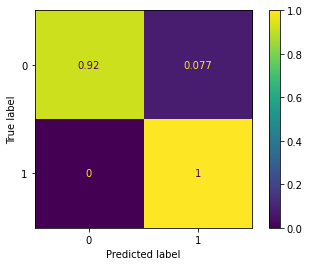

In [11]:
# Utilizando todas as colunas do dataset
with timeit():
    y = mushroom_dummy.iloc[:,0]
    X = mushroom_dummy.drop(columns=['class'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

    #classificador Naive Bayes Gaussiano
    classificador = GaussianNB()
    classificador.fit(X_train, y_train)

    y_pred = classificador.predict(X_test)

    print(classification_report(y_test, y_pred))
    print('Acurácia do modelo:', accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plot_confusion_matrix(classificador, X_test, y_test, normalize = 'true');

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       843
           1       0.99      0.84      0.91       782

    accuracy                           0.92      1625
   macro avg       0.93      0.91      0.92      1625
weighted avg       0.93      0.92      0.92      1625

Acurácia do modelo: 0.9175384615384615
[[833  10]
 [124 658]]
runtime: 0:00:00.075135


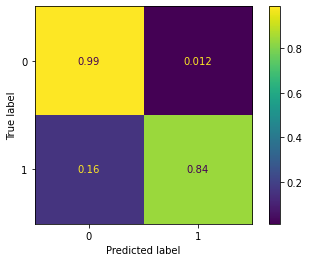

In [12]:
# Removendo colunas com baixa correlação com a variável 'class'
with timeit():
    cols = corr[corr['correlation'] >= 0.3].index

    y = mushroom_dummy.iloc[:,0]
    X = mushroom_dummy.loc[:,cols]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

    #classificador Naive Bayes Gaussiano
    classificador = GaussianNB()
    classificador.fit(X_train, y_train)

    y_pred = classificador.predict(X_test)

    print(classification_report(y_test, y_pred))
    print('Acurácia do modelo:', accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plot_confusion_matrix(classificador, X_test, y_test, normalize = 'true');

# Avalie as características do problema para eliminar as que não agregam capacidade decisória ao classificador.
Apenas a variável 'veil-type' se mostrou obviamente incapaz de agregar valor decisório, por possuir um unico valor.  

# Avalie a precisão, acurácia do classificador. Verifique o tempo de execução.
A melhor versão do classificador foi obtida utilizando a criação de variváveis dummy e utilizando todas as variáveis.  
A precisão foi de 100% na identificação de cogumelos comestiveis e 92% para os venenosos, a acurácia final foi de 96%.  
O tempo de execução foi inferior a 1 segundo em todas execuções.